In [121]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation 
% matplotlib inline

In [167]:
# load text file data
# 2d text data - number of packages sent per second and the size of the package
def load_dataset(name):
    d = pd.read_csv(name)
    x = d[d.columns[1: -1]]
    x.columns = ['sepallen', 'sepalwid', 'petallen', 'petalwid']
    mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    y = d[d.columns[-1]].replace(mapping)
    
    return x, y

In [168]:
# euclidean distance between two datapoints for as many data points as possible.
def euclidean(a, b):
    return np.linalg.norm(a - b)


** K-means**
 
- randomly choose K sample points as the initial centroids
- assign each sample point to the closest centroid
- update the centroids using the current cluster membership (mean with in membership group)
- if convergence criterion (centroids stop changing) is still not met, go to step 2

In [174]:
def kmeans(k, epsilon = 0, distance = 'euclidean'):
    
    # create list to store past centroids
    history_centroids = []
    
    if distance == 'euclidean':
        dist_method = euclidean
    
    # load the dataset
    # only work on the petal pairs for now
    x, y = load_dataset('Iris.csv')
    dataset = x[['petallen', 'petalwid']]
    
    num_instances, num_features = dataset.shape
    
    # randomly initialize the first k centroids 
    prototypes = dataset.values[np.random.randint(0, num_instances - 1, size = k)]
   
    # save the initialization to track the path of of changing centroids
    history_centroids.append(prototypes)
    
    # for stopping criterion
    norm = dist_method(prototypes, np.zeros(prototypes.shape))
    
    # for update 
    tmp_prototypes = np.zeros((k, num_features))
    
    # to store instance membership
    belongs_to = np.zeros((num_instances, 1))
    
    # centroids update process
    iteration = 0
    while norm > epsilon:
        iteration += 1
        
        # for each instance in the dataset
        for index_instance, instance in enumerate(dataset.values):
            # create a distance vector of size k for the current instance 
            dist_vec = np.zeros((k,1))
            # for each centroid
            for index_prototype, prototype in enumerate(prototypes):
                # compute the distance between teh curernt instance and each centroid
                dist_vec[index_prototype] = dist_method(prototype, instance)
            # find the shortest distance, assign the instance to that cluster
            # argmin returns the index of the min along the given axis
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
        
        # cluster center update 
        for index in range(len(prototypes)):
            # collect the indices of points assigned to the same cluster
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            # calcualte the mean of current index new centroid
            prototype = np.mean(dataset.values[instances_close], axis=0)
            # add the new centroid to the temporary list
            tmp_prototypes[index, :] = prototype
        
        # set the new list to the current list
        prototypes = tmp_prototypes           
        
        # add current centroids to the history for plotting
        history_centroids.append(tmp_prototypes)
         
        norm = dist_method(prototypes, history_centroids[-2])
        
    # return calculated centroids, history of the centroids, and instance membership
    return prototypes, history_centroids, belongs_to

In [249]:
def plot(dataset, history_centroids, belongs_to):
    # choose a color for each cluster center 
    colors = ['r', 'y', 'm']

    fig = plt.subplots()

    # for each instance 
    for index in range(dataset.shape[0]):
        # collect the points assigend to the same cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]

        for instance_index in instances_close:
            plt.scatter(dataset.values[instance_index][0], dataset.values[instance_index][1], c = (colors[index]), alpha = 0.6)

    clusters = history_centroids[-1]

    for i in range(k):
        plt.scatter(clusters[i][0], clusters[i][1], color = 'g')

    for index, centroids in enumerate(history_centroids):
        # print them all out
        for inner, item in enumerate(centroids):
            print("centroids {} {}".format(index, item))

            plt.show()

In [250]:
# main 
def execute():
    
    # train 
    centroids, history_centroids, belongs_to = kmeans(3)
    # plot 
    plot(dataset, history_centroids, belongs_to)

centroids 0 [ 5.1  1.9]


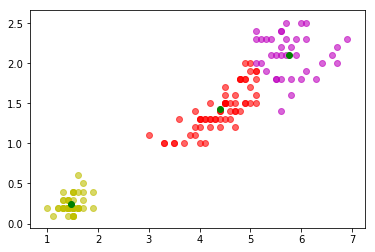

centroids 0 [ 1.4  0.2]
centroids 0 [ 5.5  2.1]
centroids 1 [ 4.4         1.42380952]
centroids 1 [ 1.464  0.244]
centroids 1 [ 5.76756757  2.10540541]
centroids 2 [ 4.4         1.42380952]
centroids 2 [ 1.464  0.244]
centroids 2 [ 5.76756757  2.10540541]


In [255]:
# run
# kmeans with different initialized cluster centers leads to different clustring results 
# average the results from several run with differnt centroids initialization 
execute()

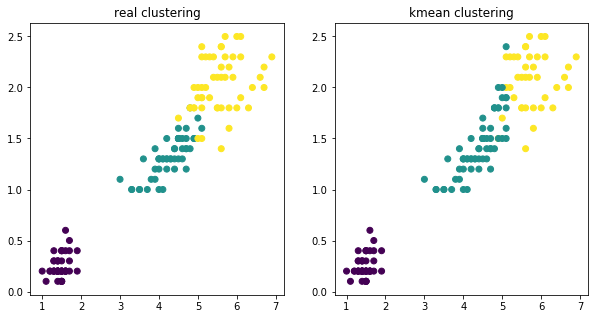

In [185]:
from sklearn.cluster import KMeans

x, y = load_dataset('Iris.csv')

model = KMeans(n_clusters = 3)
model.fit(x)


# visualization of real clustering and built in Kmean clustering 
# visualize through only the pair of petal features 

plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x.petallen, x.petalwid, c = y)
plt.title('real clustering')

plt.subplot(1, 2, 2)
plt.scatter(x.petallen, x.petalwid, c = model.labels_)
plt.title('kmean clustering')